In [3]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('airline-safety.csv')

data.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [5]:
data.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [9]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

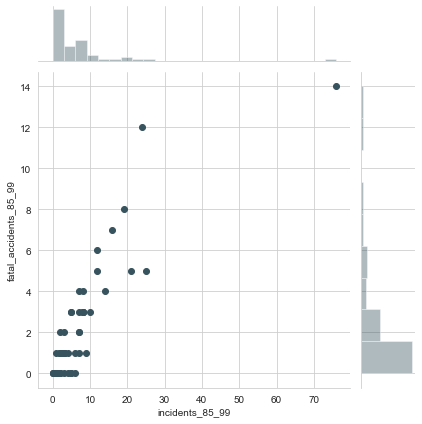

In [10]:
##explore the data
sns.jointplot(x='incidents_85_99',y='fatal_accidents_85_99',data=data)

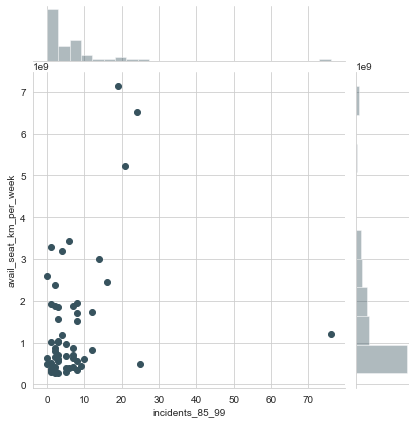

In [12]:
sns.jointplot(x='incidents_85_99',y='avail_seat_km_per_week',data=data)

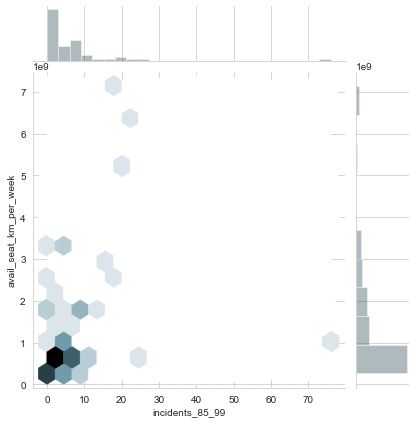

In [13]:
sns.jointplot(x='incidents_85_99',y='avail_seat_km_per_week',kind="hex",data=data)

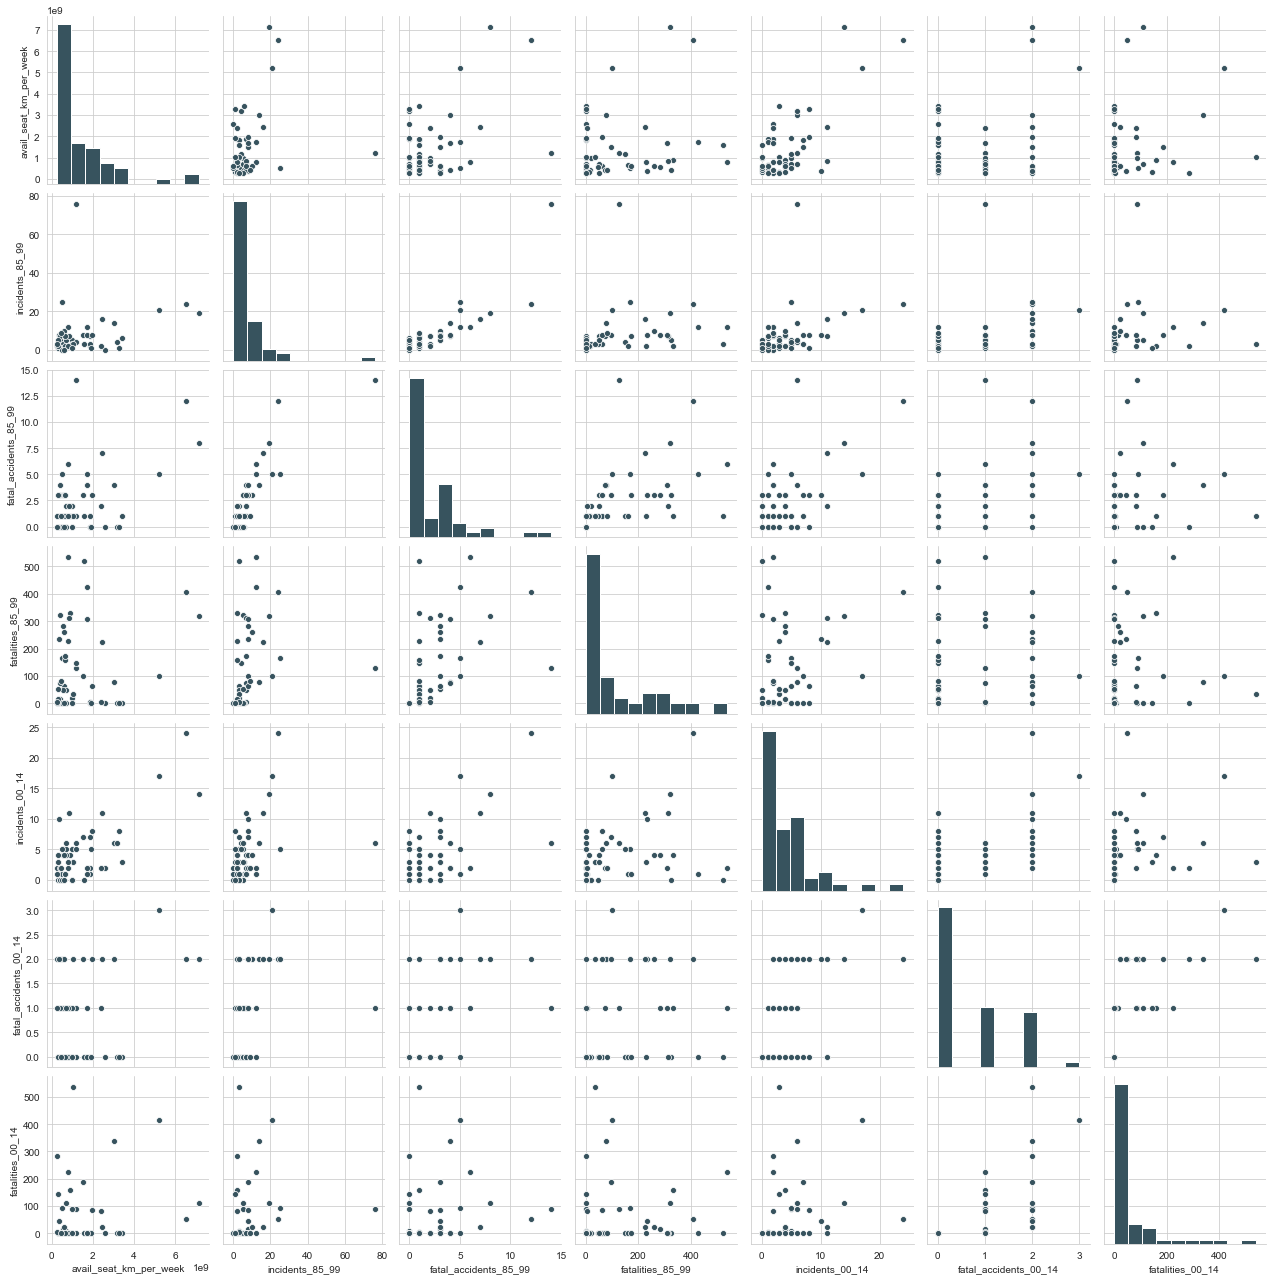

In [14]:
sns.pairplot(data)

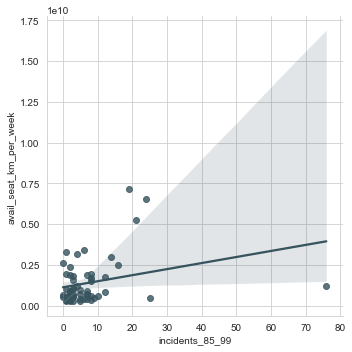

In [15]:
sns.lmplot(x='incidents_85_99',y='avail_seat_km_per_week',data=data)

In [20]:
X = data[['avail_seat_km_per_week','incidents_85_99','fatal_accidents_85_99','fatalities_85_99']]

In [27]:
y = data['incidents_00_14']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
lm.coef_

array([ 6.36503689e-10,  6.40977595e-01, -4.88195588e-02, -1.51013062e-03])

Text(0, 0.5, 'Predicted Y')

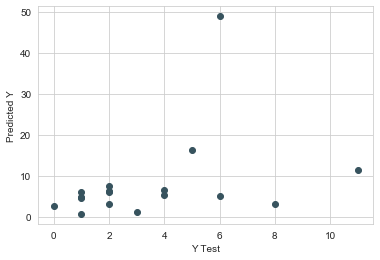

In [34]:
## predicting test data

predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [35]:
from sklearn import metrics

In [36]:
# evaluating the model

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   5.641602799488275
MSE :   125.1172035677645
RMAE :   11.185580162323477


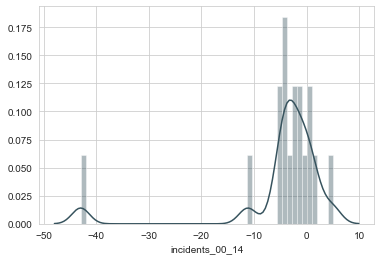

In [37]:
## residuals Plot a histogram of the residuals and make sure it looks normally distributed use either seaborn distplot or plt.hist()

sns.distplot(y_test - predictions,bins=50)

In [38]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
avail_seat_km_per_week,6.365037e-10
incidents_85_99,6.409776e-01
fatal_accidents_85_99,-4.881956e-02
fatalities_85_99,-1.510131e-03
